In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
data=pd.read_csv("Amazon Sale Report.csv")

In [3]:
data

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128971,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,False,NaN,NaN,NaN
128972,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,...,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,False,NaN,NaN,NaN
128973,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,...,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,False,NaN,NaN,NaN
128974,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,...,INR,1199.00,Halol,Gujarat,389350.0,IN,False,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [5]:
data.isnull().sum()

index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7800
Amount                  7800
ship-city                 35
ship-state                35
ship-postal-code          35
ship-country              35
B2B                        0
fulfilled-by           89713
New                   128976
PendingS              128976
dtype: int64

In [6]:
data.shape

(128976, 21)

# DATA CLEANING

### We are going to clean column new and pendings by removing it as all values are null

In [7]:
data.drop(["New", "PendingS"], axis=1, inplace=True)

In [8]:
data.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

In [9]:
data.describe()

,index,Qty,Amount,ship-postal-code
count,128976.000000,128976.000000,121176.000000,128941.000000
mean,64486.130427,0.904401,648.562176,463945.677744
std,37232.897832,0.313368,281.185041,191458.488954
min,0.000000,0.000000,0.000000,110001.000000
25%,32242.750000,1.000000,449.000000,382421.000000
50%,64486.500000,1.000000,605.000000,500033.000000
75%,96730.250000,1.000000,788.000000,600024.000000
max,128974.000000,15.000000,5584.000000,989898.000000


### Currency null data is filled with the frequent occuring currency

In [10]:
valueINR=data["currency"].mode()[0]
valueINR

'INR'

In [11]:
data["currency"].fillna(value=valueINR,inplace=True)
data

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128971,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,False,NaN
128972,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,1,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,False,NaN
128973,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,1,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,False,NaN
128974,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,1,INR,1199.00,Halol,Gujarat,389350.0,IN,False,NaN


### Amount has null values we aere going to fill it with 0 because-
Using zero as a replacement for null values in e-commerce data is a common practice because it signifies that there was no monetary transaction or that the transaction amount was effectively zero. This allows for accurate calculations and analysis, ensuring that the absence of a value doesn't distort overall metrics or calculations. Additionally, zero is a neutral value that doesn't skew statistical analyses or calculations.

In [12]:
data["Amount"].fillna(value=0,inplace=True)

#### "ship-city" column: Null values are filled with the mode (most frequent value) of the "ship-city" column. This is done because the mode represents the most common city in the dataset, providing a reasonable approximation for missing values. Filling null values with the mode helps maintain the distribution of cities in the dataset.


In [13]:
data["ship-city"].fillna(value=data["ship-city"].mode()[0],inplace=True)

#### "ship-postal-code" column: Null values are filled with zero (0). This is a common practice when dealing with postal codes, as it indicates that no postal code is available or provided. Filling null values with zero ensures consistency in data type and avoids potential errors when performing numerical operations.Converting "ship-postal-code" to integers: After filling null values with zero, the column is converted to integers. Postal codes are typically represented as integers, and converting the column to this data type ensures uniformity and facilitates further analysis or processing.



In [14]:
data["ship-postal-code"].fillna(value=0,inplace=True)

In [15]:
data["ship-postal-code"]=data["ship-postal-code"].astype(int)

#### "ship-state" column: Null values are filled with the mode of the "ship-state" column, similar to how it was done for the "ship-city" column. Filling null values with the mode provides a reasonable estimate of the missing states based on the most common state in the dataset.



In [16]:
data["ship-state"].fillna(value=data["ship-state"].mode()[0],inplace=True)

#### "ship-country" column: Null values are filled with the mode of the "ship-country" column. Similar to the city and state columns, filling null values with the mode ensures that the most common country in the dataset is used to replace missing values, maintaining consistency and accuracy in the data.


In [17]:
data["ship-country"].fillna(value=data["ship-country"].mode()[0],inplace=True)

In [18]:
data.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
Courier Status            0
Qty                       0
currency                  0
Amount                    0
ship-city                 0
ship-state                0
ship-postal-code          0
ship-country              0
B2B                       0
fulfilled-by          89713
dtype: int64

#### REASON WHY FULFILLED BY IS BEING REMOVED BECAUSE OF ITS EXCESS NULL VALUES

In [19]:
data.drop(["fulfilled-by"],axis=1,inplace=True)

In [20]:
data.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B'],
      dtype='object')

In [21]:
data["Date"] = pd.to_datetime(data["Date"])

In [22]:
data.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081,IN,False
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085,IN,False
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210,IN,True
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008,IN,False
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073,IN,False


In [23]:
data.rename(columns={"Qty":"Quantity"})

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Quantity,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081,IN,False
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085,IN,False
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210,IN,True
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008,IN,False
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073,IN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128971,128970,406-6001380-7673107,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,517.00,HYDERABAD,TELANGANA,500013,IN,False
128972,128971,402-9551604-7544318,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,1,INR,999.00,GURUGRAM,HARYANA,122004,IN,False
128973,128972,407-9547469-3152358,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,1,INR,690.00,HYDERABAD,TELANGANA,500049,IN,False
128974,128973,402-6184140-0545956,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,1,INR,1199.00,Halol,Gujarat,389350,IN,False


In [24]:
data.describe()

,index,Qty,Amount,ship-postal-code
count,128976.000000,128976.000000,128976.000000,128976.000000
mean,64486.130427,0.904401,609.339491,463819.777587
std,37232.897832,0.313368,313.342529,191584.970648
min,0.000000,0.000000,0.000000,0.000000
25%,32242.750000,1.000000,413.000000,382421.000000
50%,64486.500000,1.000000,583.000000,500033.000000
75%,96730.250000,1.000000,771.000000,600024.000000
max,128974.000000,15.000000,5584.000000,989898.000000


In [25]:
data["Date"].dtype

dtype('<M8[ns]')

In [26]:
data.describe(include=['object'])

,Order ID,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,currency,ship-city,ship-state,ship-country
count,128976,128976,128976,128976,128976,128976,128976,128976,128976,128976,128976,128976
unique,120229,13,2,2,2,9,11,4,1,8948,69,1
top,403-4984515-8861958,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,INR,BENGALURU,MAHARASHTRA,IN
freq,12,77815,89713,128852,88630,50292,22373,109486,128976,11243,22307,128976


# Exploratory Data Analysis

In [27]:
data.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B'],
      dtype='object')

Text(0.5, 1.0, 'Tshirt Size Sold')

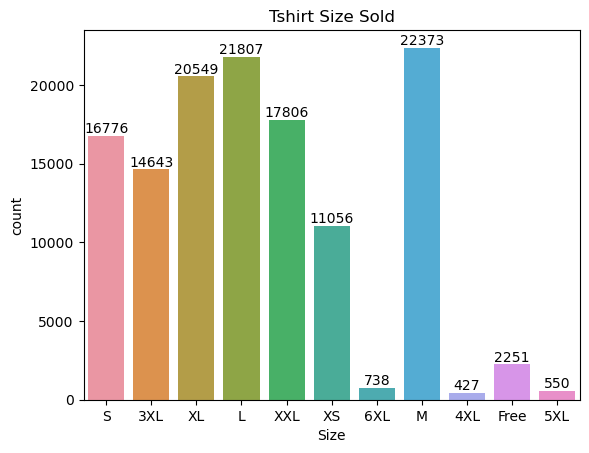

In [28]:
k=sns.countplot(x="Size",data=data)
for i in k.containers:
    k.bar_label(i)
plt.title("Tshirt Size Sold")

## Note: From above Graph you can see that most of the people buys M-Size

In [29]:
data.groupby(['Size'], as_index=False)['Qty'].sum().sort_values(by='Qty',ascending=False)
#The groupby() function in pandas is used to group data based on one or more columns in a DataFrame

,Size,Qty
6,M,20138
5,L,19706
8,XL,18636
10,XXL,16246
7,S,15041
0,3XL,13360
9,XS,9850
4,Free,2070
3,6XL,688
2,5XL,513


<Axes: xlabel='Size', ylabel='Qty'>

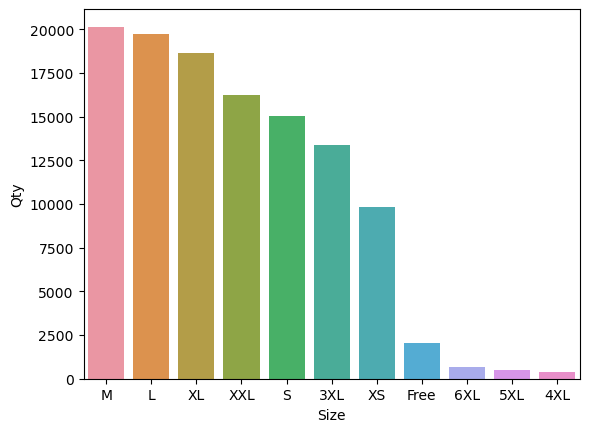

In [30]:
Qty=data.groupby(['Size'], as_index=False)['Qty'].sum().sort_values(by='Qty',ascending=False)

sns.barplot(x='Size',y='Qty', data=Qty)


#### Note: From above Graph you can see that most of the Qty buys M-Size in the sales

# Courier Status

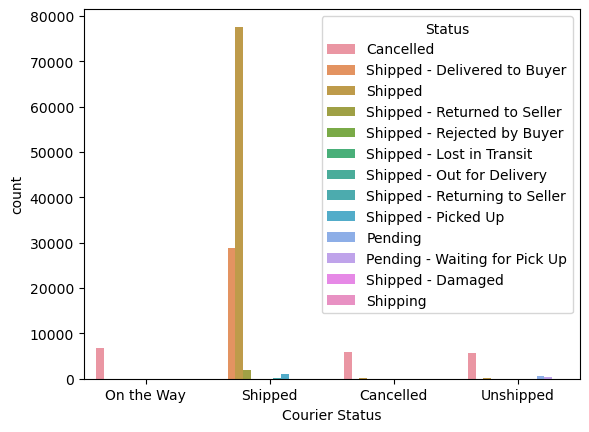

In [31]:
k1=sns.countplot(x="Courier Status",data=data,hue='Status')


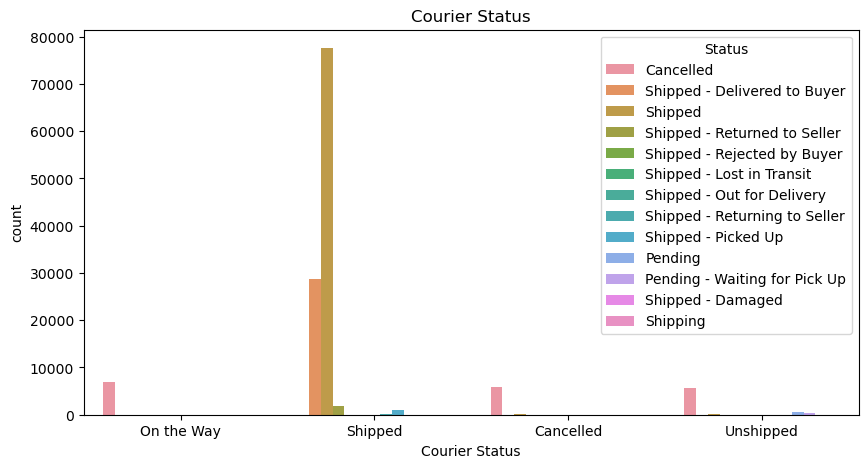

In [32]:
plt.figure(figsize=(10,5))
plt.title("Courier Status")
k2=sns.countplot(data=data, x='Courier Status',hue= 'Status')
plt.show()

#### Note: From above Graph the majority of the orders are shipped through the courier. 

<Axes: >

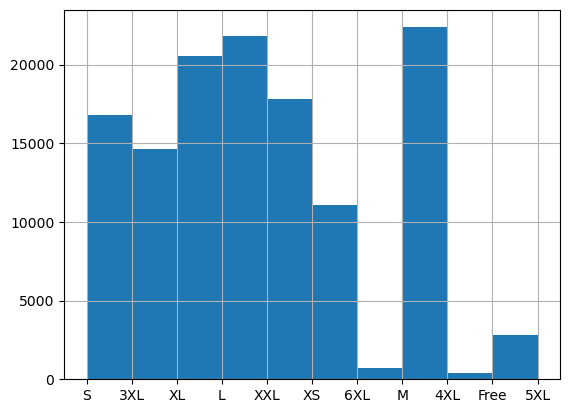

In [33]:
data['Size'].hist()

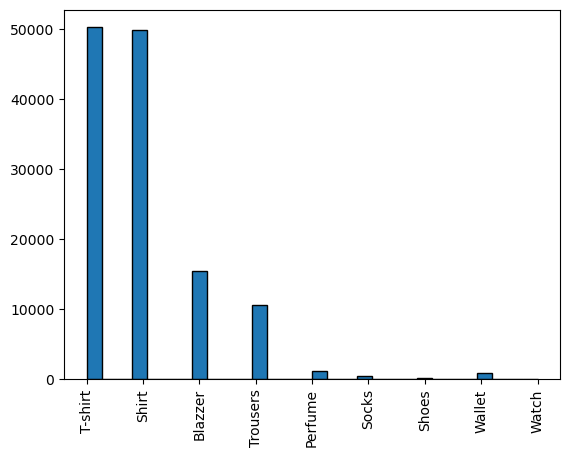

<Figure size 1000x500 with 0 Axes>

In [56]:

plt.hist(data['Category'],bins=30,edgecolor="black")
plt.xticks(rotation=90)
plt.figure(figsize=(10,5))
plt.show()

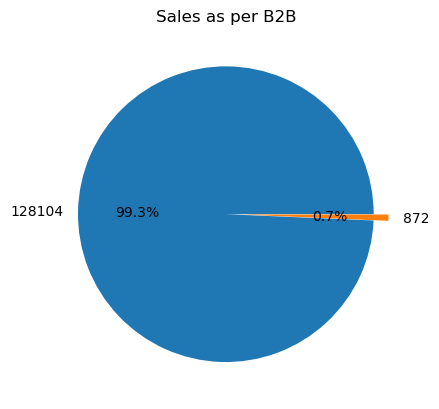

In [71]:
c=data["B2B"].value_counts()
plt.pie(c,labels=c,autopct='%1.1f%%',explode=[0,0.1])
plt.title("Sales as per B2B")
plt.show()

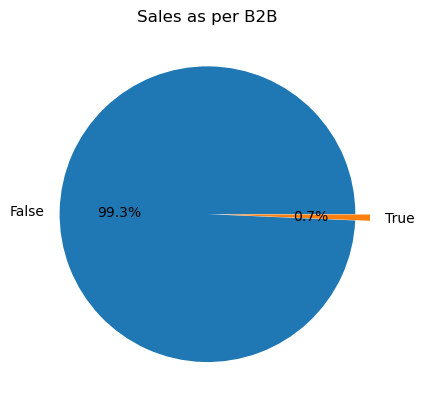

In [72]:
c=data["B2B"].value_counts()
plt.pie(c,labels=c.index,autopct='%1.1f%%',explode=[0,0.1])
plt.title("Sales as per B2B")
plt.show()

Note : From above chart we can see that maximum i.e. 99.3% of buyers are retailers and 0.7% are B2B buyers

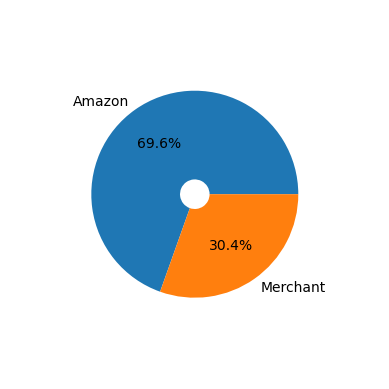

In [80]:
a1 = data['Fulfilment'].value_counts()
fig, ax = plt.subplots()
ax.pie(a1, labels=a1.index, autopct='%1.1f%%', radius=0.7, wedgeprops=dict(width=0.6))
ax.set(aspect="equal")
plt.show()

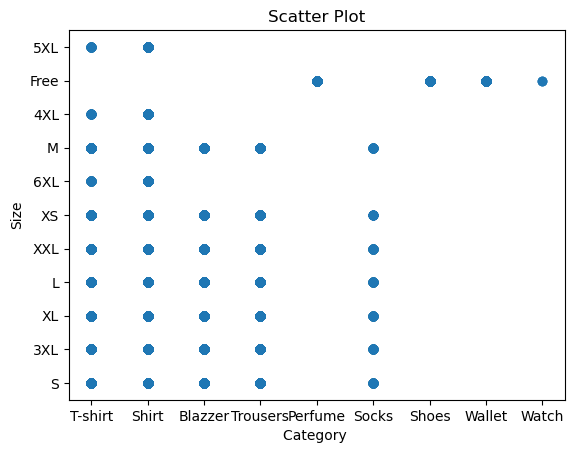

In [82]:
# Prepare data for scatter plot
x_data = data['Category']  
y_data = data['Size'] 

# Plot the scatter plot
plt.scatter(x_data, y_data)
plt.xlabel('Category ')  
plt.ylabel('Size')  
plt.title('Scatter Plot') 
plt.show()

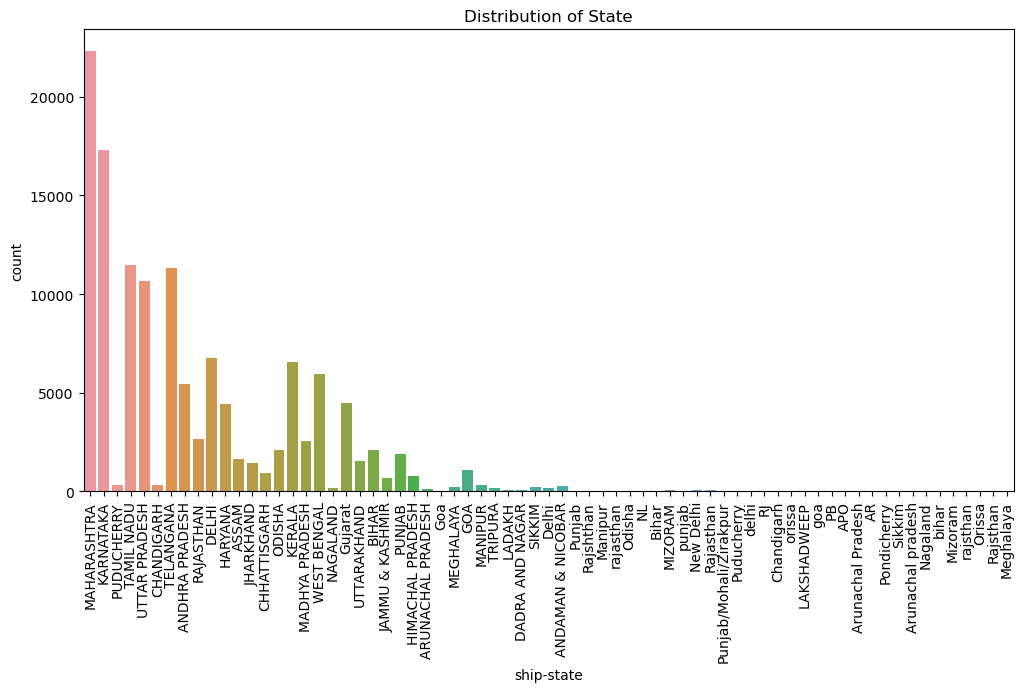

In [84]:
# Plot count of cities by state
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='ship-state')
plt.xlabel('ship-state')
plt.ylabel('count')
plt.title('Distribution of State')
plt.xticks(rotation=90)
plt.show()

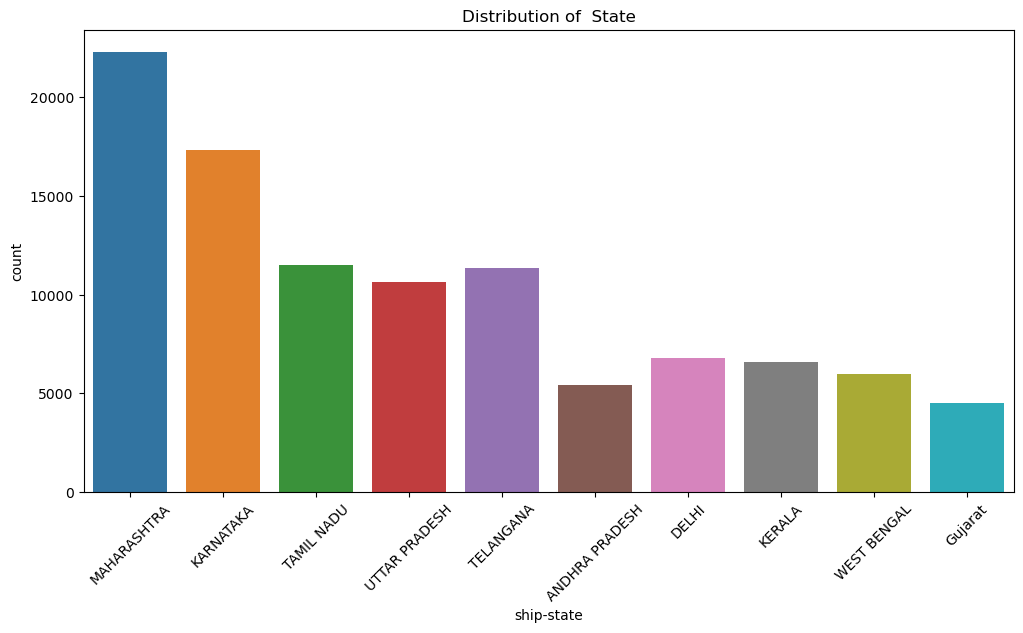

In [87]:
# top_10_States 
top_10_state = data['ship-state'].value_counts().head(10)
# Plot count of cities by state
plt.figure(figsize=(12, 6))
sns.countplot(data=data[data['ship-state'].isin(top_10_state.index)], x='ship-state')
plt.xlabel('ship-state')
plt.ylabel('count')
plt.title('Distribution of  State')
plt.xticks(rotation=45)
plt.show()